<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_06_mlp_cnn_rnn_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP, CNN, and RNNs

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input

## Dense layer
- fully connected layer
- Now the model will take as input arrays of shape (None, 16)  and output arrays of shape (None, 32).  
- Note that after the first layer, you don't need to specify the size of the input anymore: 

In [ ]:
# Dense layer 
model = tf.keras.models.Sequential()

# model.add(Input(shape=(16,)))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, input_shape=(16,), activation='relu'))
model.add(layers.Dense(32))
model.summary()
model.output_shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


(None, 32)

In [ ]:
model = keras.models.Sequential()
input = keras.Input(shape=(16, ))
x = layers.Dense(32, activation="relu")(input)
output = layers.Dense(32)(x)
model = keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## CNN layer
- When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis)

In [ ]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(2, (3,3), input_shape=(28,28,3), 
                        activation='relu'))
model.summary()
model.output_shape

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         56        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


(None, 26, 26, 2)

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch  
# size is 4.  
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, (3,3), activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
# With `dilation_rate` as 2. (3x3 필터 외곽 모형이 5x5 가 됨)
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', 
                           dilation_rate=2, input_shape=input_shape[1:])(x)
print(y.shape)

(4, 24, 24, 2)


In [ ]:
# With `padding` as "same" (same) or "valid" (no padding)  
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', 
                           padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 2)


## RNN layers
- SImpleRNN(units, return_sequences, return_state):
  - Fully-connected RNN where the output is to be fed back to input.
  - units: Positive integer, dimensionality of the output space
  - return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
  - return_state: Boolean. Whether to return the last state in addition to the output. Default: False
- inputs: A 3D tensor, with shape [batch, timesteps, feature] (RNN 셀에 입력되는 텐서의 모양은 (batch_size, timesteps, input_dim)
- output shape: (batch_size, units) or (batch_size, timesteps, units), if return_sequences=True. 
- A RNN layer can return the entire sequence of outputs for each sample (one vector per timestep per sample), if return_sequences=True.
- LSTM
- GRU


- 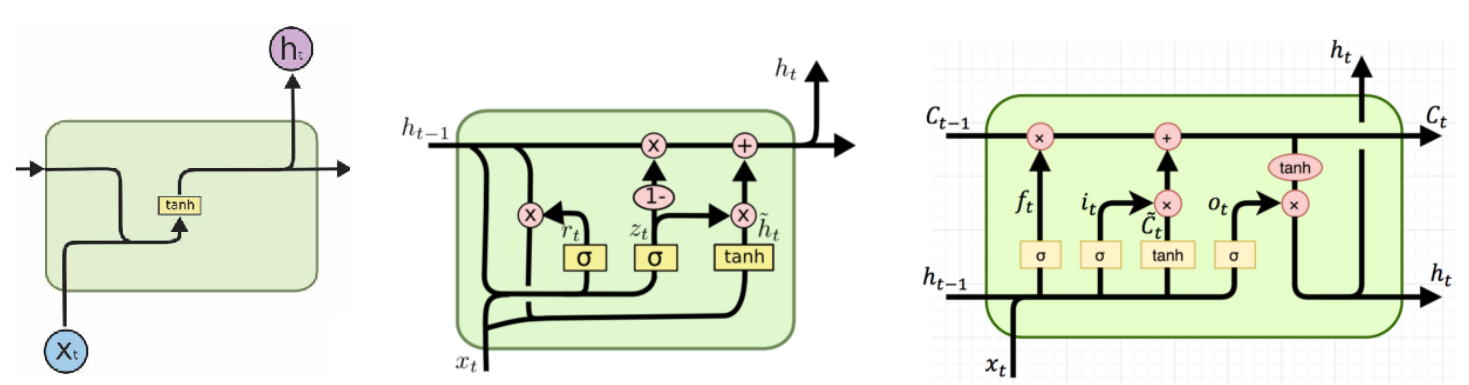

- from https://medium.com/@saurabh.rathor092/simple-rnn-vs-gru-vs-lstm-difference-lies-in-more-flexible-control-5f33e07b1e57

In [ ]:
# example 1

In [ ]:
# RNN 입력 데이터 예시
x = np.array([[[1, 2, 3],     # => timestep 1                            
               [4, 5, 6]],    # => timestep 2, # => batch 1 
                                          
              [[7, 8, 9], 
               [10, 11, 12]], # => batch 2
              
              [[13, 14, 15], 
               [16, 17, 18]]  # => batch 3
             ])

print('(Batch size, timesteps, input_dim) = ',x.shape)

(Batch size, timesteps, input_dim) =  (3, 2, 3)


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50)(x)   # returns one
print(rnn.shape)

(None, 50)


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True)(x)
print(rnn.shape)                # returns one

(None, 10, 50)


In [ ]:
x = layers.Input(shape=(10,30))
rnn = layers.SimpleRNN(50, return_sequences = True, return_state = True)(x)
print(len(rnn))                 # returns two (whole sequence, final state)
print(rnn[0].shape, rnn[1].shape)

2
(None, 10, 50) (None, 50)


In [ ]:
# when batch_size is given ( the same)
x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4)(x)
print(rnn.shape)  # The output has shape `[32, 4]`

x = np.random.random([32, 10, 8]).astype('float32')
rnn = layers.SimpleRNN(4, return_sequences=True, return_state=True)(x)
whole_sequence_output, final_state = rnn[0], rnn[1]
print(whole_sequence_output.shape, final_state.shape)

(32, 4)
(32, 10, 4) (32, 4)


In [ ]:
# example 2
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))   # 128 internal units
model.add(layers.Dense(10))   # 10 units
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_36 (SimpleRNN)    (None, 128)               24704     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 89,994
Trainable params: 89,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1000 * 64 = 64000
# (64 + 128) *128 + 128 = 24704

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))   # 128 internal units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# (64 + 128) *128 + 128 = 24704
# 24704 * 4 = 98816

In [ ]:
# LSTM
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128, return_sequences=True))   # 128 internal units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         98816     
_________________________________________________________________
dense_6 (Dense)              (None, None, 10)          1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


- By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. 
- The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.
- A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. The shape of this output is (batch_size, timesteps, units).
- In addition, a RNN layer can return its final internal state(s) by giving return_state=True. The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 128)
model.add(layers.GRU(128, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         74496     
_________________________________________________________________
simple_rnn_37 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 172,682
Trainable params: 172,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# GRU: 24704 * 3  이 아님 (weight 에 bias 주는 방법이 약간 다름)

## Embedding Layer
- can only be used as the first layer in a model
- Turns positive integers (indexes) into dense vectors of fixed size:
  - (ex) [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

- Embedding(input_dim, output_dim, input_length):
  - input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  - output_dim: Integer. Dimension of the dense embedding.
  - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
- input_shape: (batch, input_length)
- output_shape: (batch, input_length. output_dim)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch, input_length), 
# and the largest integer (i.e. word index) in the input  
# should be no larger than 999 (vocabulary size).  
# Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.  
x = np.random.randint(1000, size=(32, 10))
output = model.predict(x)
print(output.shape)

(32, 10, 64)


## Bidirectional RNNs
- For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.
- (ex) what word might be appropriate?
   - I am ___.
   - I am ___ hungry.
   - I am ___ hungry, and I can eat half a pig.
- Depending on the amount of information available, we might fill in the blanks with very different words such as “happy”, “not”, and “very”. Clearly the end of the phrase (if available) conveys significant information about which word to pick.
- need entire sentences to predict

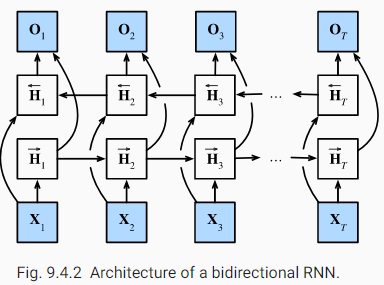

In [ ]:
model = tf.keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


- Under the hood, Bidirectional will copy the RNN layer passed in, and flip the go_backwards field of the newly copied layer, so that it will process the inputs in reverse order.
- The output of the Bidirectional RNN will be, by default, the sum of the forward layer output and the backward layer output. If you need a different merging behavior, e.g. concatenation, change the merge_mode parameter in the Bidirectional wrapper constructor. For more details about Bidirectional, please check the API docs.